# 1. JDK & JRE
---

我的电脑有两个jdk, 一个是我自己下载的jdk17, 一个是电脑预安装的jdk 19:

```bash
ls /Library/Java/JavaVirtualMachines/jdk-19.jdk/Contents/Home/
LICENSE bin     include legal   man README  conf    jmods   lib     release

ls ~/Downloads/Programs/jdk-17-0-3-1/Home/
LICENSE README  bin     conf    include jmods   legal   lib     release
```

都说JDK包括JRE, 然后JRE里面有JVM, 但是现在新版本的JDK里没有JRE文件夹了, JRE被单独安装了, 那么现在对于新版本的JDK来说, JRE是不是仍然属于JDK呢? 知道这个问题和现实就行了, 至于属不属于无所谓, 想怎么说就怎么说呗, 关键是我们得是找, 什么是JVM, 什么是JDK才是重要的. 


- In macOS, the JDK installation path is/Library/Java/JavaVirtualMachines/jdk-10.jdk/Contents/Home.
- In macOS, the JRE installation path is/Library/Internet Plug-Ins/JavaAppletPlugin.plugin/Contents/Home/.

但是我去找jre却没找到, 官方说 When you install JDK 10, the public JRE (Release 10) also gets installed automatically. 他说的这种安装是下载dmg文件, 而我下的是免安装版本的zip包, 解压出来就用了, 所以ummmm, 具体也不清楚以后再想吧...



# 2. PATH Variable
---

You should set the `PATH` variable if you want to be able to run the executables (javac, java, javadoc, and so on) from any directory without having to type the full path of the command. If you do not set the PATH variable, you need to specify the full path to the executable every time you run it, such as:

```bash
/usr/local/jdk1.7.0/bin/javac MyClass.java
```

怎么设置PATH呢, 也就是win里面说的怎么添加环境变量呢? 编辑`~/.bashrc`或者`.zshrc`, 看你用的什么bash, 默认用的都是bash, 我是自己用的zsh

```
# 填进文件里,
export PATH=$PATH:/place/with/the/file
```

其实这个很容易看出什么意思, PATH = `$PATH` + `/place/with/the/file`, 橘子里面的分号就是个separator而已. 比如下面的输出, 一看就明白了:

```bash
echo $PATH
/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin
```

On most systems (Linux, Mac OS, UNIX, etc) the colon character (`:`) is the classpath separator. In windowsm the separator is the semicolon (`;`)

> 其实PATH就是告诉terminal可执行指令的位置信息, 而CLASSPATH是用来告诉JRE相关程序 用户自定义类 的位置信息 

# 3. CLASSPATH
---

> 与PATH相同(PATH是terminal用来找可执行命令的一个环境变量), classpath是JVM用到的一个环境变量，它用来指示JVM如何搜索class。

因为Java是编译型语言，源码文件是`.java`，而编译后的`.class`文件才是真正可以被JVM执行的字节码。因此，如果要加载一个`abc.xyz.Hello`的类，JVM需要知道应该去哪搜索对应的`Hello.class`文件。所以，classpath就是一组目录的集合，它设置的搜索路径与操作系统相关。例如，在Windows系统上，用`;`分隔，带**空格的目录**用`""`括起来，可能长这样：
```
C:\work\project1\bin;C:\shared;"D:\My Documents\project1\bin"
```

在Linux系统上，用`:`分隔，可能长这样：

```
/usr/shared:/usr/local/bin:/home/liaoxuefeng/bin
```

现在我们假设`classpath`是`.;C:\work\project1\bin;C:\shared`，当JVM在加载`abc.xyz.Hello`这个类时，会依次查找：

- <当前目录>\abc\xyz\Hello.class
- C:\work\project1\bin\abc\xyz\Hello.class
- C:\shared\abc\xyz\Hello.class

注意到`.`代表当前目录。如果JVM在某个路径下找到了对应的`class`文件，就不再往后继续搜索。如果所有路径下都没有找到，就报错。

我们强烈不推荐在系统环境变量中设置classpath，那样会污染整个系统环境。**在启动JVM时设置`classpath`才是推荐的做法**。实际上就是给java命令传入`-classpath`或`-cp`参数：

```shell
java -cp .;C:\work\project1\bin;C:\shared abc.xyz.Hello
```

没有设置系统环境变量classpath也没有传入-cp参数时，那么JVM默认的classpath为`.`，即当前目录. 

```
java abc.xyz.Hello
```

上述命令告诉JVM搜索class文件路径为:`./abc/xyz/Hello.class`. 

例子, 比如我写个`Cat`类, 在包`com.zhu.servlet`, 编译运行指令如下:

```java
package com.zhu.servlet;

public class Cat {
    public static void main(String[] args) {
        System.out.println("hello world!");
    }
}
```

```shell
javac com/zhu/servlet/Cat.java 

java Cat                      
Error: Could not find or load main class Cat
Caused by: java.lang.ClassNotFoundException: Cat

java com.zhu.servlet.Cat
hello world!
```

所以这也说明了类的全名应该是包名+类名, 而不只是一个简单的类名. 

You can check value of classpath in java inside your application by looking at following system property “java.class.path”:
```
System.getProperty("java.class.path")
```

### 3.1.1 How do you set your classpath?

```
export CLASSPATH=$PATH:/home/myaccount/myproject/lib/CoolFramework.jar:/home/myaccount/myproject/output/
```

这只是举个例子, 更好的做法就是用第二种方法, 就是启动JVM的通过`-cp`来指定classpath, 不要在环境变量中设置classpath！默认的当前目录`.`对于绝大多数情况都够用了。

```
C:\work> java -cp . com.example.Hello
```


# 4. jar包
---

如果有很多`.class`文件，散落在各层目录中，肯定不便于管理。如果能把目录打一个包，变成一个文件，就方便多了。

jar包实际上就是一个zip格式的压缩文件，而jar包相当于目录。如果我们要执行jar包的里面的某个`class`，就可以把jar包放到`classpath`中：

```
java -cp ./hello.jar abc.xyz.Hello
```

这样JVM会自动在`hello.jar`文件里去搜索某个类。

因为jar包就是zip包，所以，直接在资源管理器中，找到正确的目录，点击右键，在弹出的快捷菜单中选择“发送到”，“压缩(zipped)文件夹”，就制作了一个zip文件。然后，把后缀从`.zip`改为`.jar`，一个jar包就创建成功。

假设编译输出的目录结构是这样：

```
package_sample
└─ bin
   ├─ hong
   │  └─ Person.class
   │  ming
   │  └─ Person.class
   └─ mr
      └─ jun
         └─ Arrays.class
```

这里需要特别注意的是，jar包里的第一层目录，不能是`bin`，而应该是`hong`、`ming`、`mr`。如果在Windows的资源管理器中看，应该长这样：



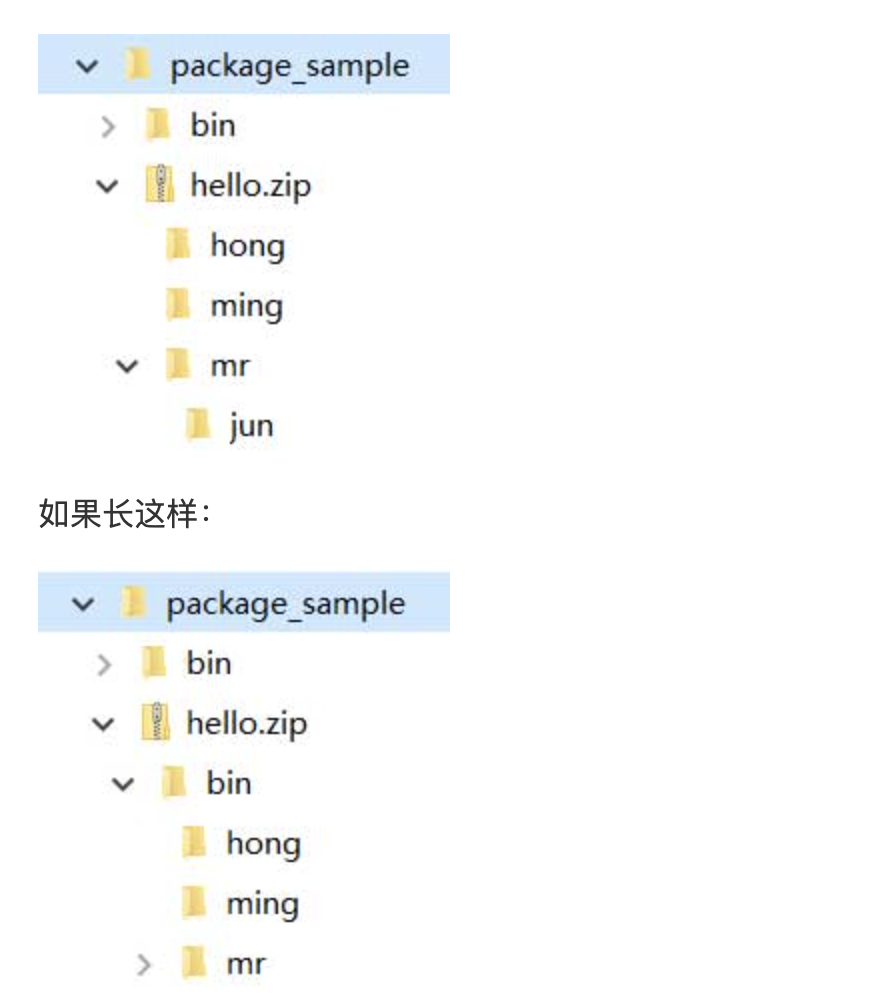

说明打包打得有问题，JVM仍然无法从jar包中查找正确的class，原因是`hong.Person`必须按`hong/Person.class`存放，而不是`bin/hong/Person.class`。

jar包还可以包含一个特殊的`/META-INF/MANIFEST.MF`文件，`MANIFEST.MF`是纯文本，可以指定Main-Class和其它信息。JVM会自动读取这个MANIFEST.MF文件，如果存在Main-Class，我们就不必在命令行指定启动的类名，而是用更方便的命令：

```shell
java -jar hello.jar
```

在大型项目中，不可能手动编写`MANIFEST.MF`文件，再手动创建zip包。Java社区提供了大量的开源构建工具，例如**Maven**，可以非常方便地创建jar包。

**原文:** https://www.liaoxuefeng.com/wiki/1252599548343744/1260466914339296

# 5. How the Java Launcher Finds Classes
---

The Java launcher, `java`, initiates the Java virtual machine. The virtual machine searches for and loads classes in this order:

- Bootstrap classes - Classes that comprise the Java platform, including the classes in `rt.jar` and several other important jar files.
- Extension classes - Classes that use the Java Extension mechanism. These are bundled as `.jar` files located in the extensions directory.
- User classes - Classes defined by developers and third parties that do not take advantage of the extension mechanism. You identify the location of these classes using the -classpath option on the command line (the preferred method) or by using the CLASSPATH environment variable. (See Setting the Classpath for [Windows or Unix](https://docs.oracle.com/javase/8/docs/technotes/tools/unix/classpath.html).)


https://docs.oracle.com/javase/8/docs/technotes/tools/findingclasses.html